<a href="https://www.kaggle.com/code/shandeep777/big-mart-sales-prediction?scriptVersionId=248673659" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/big-mart-sales-prediction-datasets/train.csv')

In [3]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1840,NCE19,8.970,Low Fat,0.093015,Household,52.7956,OUT046,1997,Small,Tier 1,Supermarket Type1,1037.3164
3167,FDL51,20.700,Regular,0.047482,Dairy,215.9876,OUT035,2004,Small,Tier 2,Supermarket Type1,3430.2016
1968,NCK06,NaN,Low Fat,0.008605,Household,123.1756,OUT027,1985,Medium,Tier 3,Supermarket Type3,1211.7560
3896,FDV23,NaN,Low Fat,0.185307,Breads,125.6046,OUT019,1985,Small,Tier 1,Grocery Store,622.5230
4114,FDZ01,8.975,Regular,0.009051,Canned,103.0990,OUT013,1987,High,Tier 3,Supermarket Type1,309.5970


### Find shape of our data

In [4]:
df.shape

(8523, 12)

### Get Summary of our dataset

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Check NULL values in the dataset

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.isna().sum() * 100 / len(df)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

### Taking care of duplicate values

In [8]:
df.duplicated().any()

False

### Handling the missing values

In [9]:
df['Item_Weight_mean'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Item_Weight_median'] = df['Item_Weight'].fillna(df['Item_Weight'].median())

In [10]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_mean',
       'Item_Weight_median'],
      dtype='object')

In [11]:
print("Original weight variable variance ", df['Item_Weight'].var())
print("Item weight variable after mean impute ", df['Item_Weight_mean'].var())
print("Item weight variable after median impute ", df['Item_Weight_median'].var())

Original weight variable variance  21.56168825983637
Item weight variable after mean impute  17.860121735060453
Item weight variable after median impute  17.869561454073366


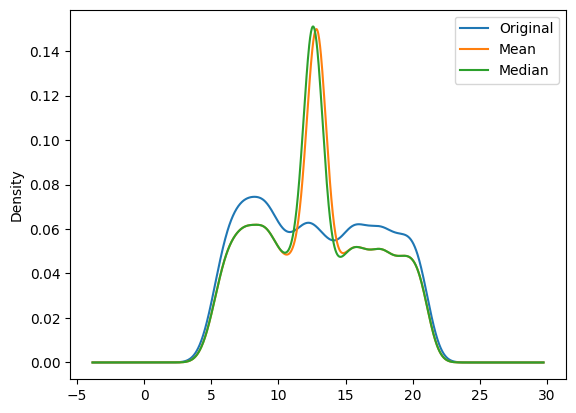

In [12]:
df['Item_Weight'].plot(kind='kde', label="Original")
df['Item_Weight_mean'].plot(kind='kde', label="Mean")
df['Item_Weight_median'].plot(kind='kde', label="Median")
plt.legend()
plt.show()

<Axes: >

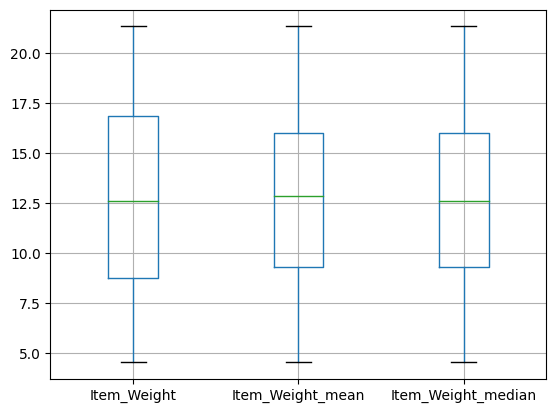

In [13]:
df[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

In [14]:
df['Item_Weight_interpolate'] = df['Item_Weight'].interpolate(method='linear')

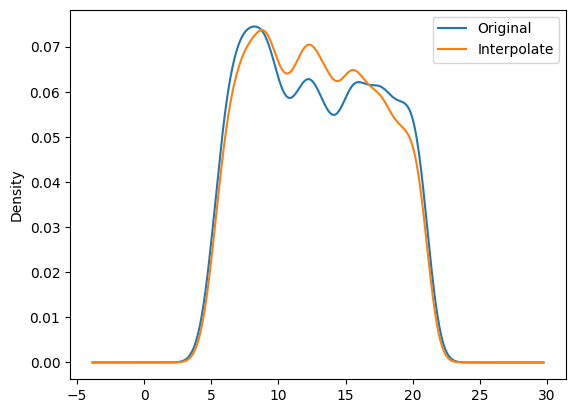

In [15]:
df['Item_Weight'].plot(kind='kde', label="Original")
df['Item_Weight_interpolate'].plot(kind='kde', label="Interpolate")
plt.legend()
plt.show()

### Multivariate Imputation

In [16]:
from sklearn.impute import KNNImputer

In [17]:
knn = KNNImputer(n_neighbors=10, weights='distance')

In [18]:
df['knn_impute'] = knn.fit_transform(df[['Item_Weight']]).ravel()

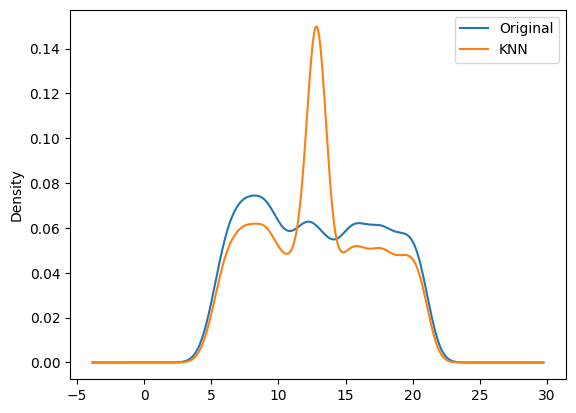

In [19]:
df['Item_Weight'].plot(kind='kde', label="Original")
df['knn_impute'].plot(kind='kde', label="KNN")
plt.legend()
plt.show()

In [20]:
df = df.drop(columns=['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_impute'],axis=1)

In [21]:
df.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [22]:
df.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interpolate         0
dtype: int64

### Outlet Size

In [23]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [24]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [25]:
mode_oulet = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))

In [26]:
mode_oulet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [27]:
missing = df['Outlet_Size'].isna()
missing

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [28]:
df.loc[missing, 'Outlet_Size'] = df.loc[missing, 'Outlet_Type'].apply(lambda x: mode_oulet[x])

In [29]:
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
dtype: int64

### Item_Fat_Content

In [30]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [31]:
df.replace({'Item_Fat_Content':{'Low Fat':'LF','Regular':'REG','low fat':'LF','reg':'REG'}},inplace=True)

In [32]:
df['Item_Fat_Content'].unique()

array(['LF', 'REG'], dtype=object)

### Item_Visibility

In [33]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [34]:
df['Item_Visibility_Iterpolate'] = df['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [35]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

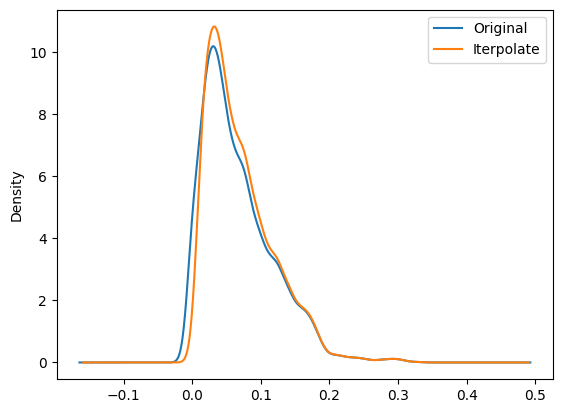

In [36]:
df['Item_Visibility'].plot(kind='kde', label='Original')
df['Item_Visibility_Iterpolate'].plot(kind='kde', label='Iterpolate')
plt.legend()
plt.show()

In [37]:
df = df.drop(columns=['Item_Visibility'],axis=1)

In [38]:
df.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_Iterpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,REG,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,REG,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


### Item_Type

In [39]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

### Item_Identifier

In [40]:
df['Item_Identifier'].value_counts().sample(5)

Item_Identifier
NCE30    6
FDV28    7
FDW12    7
FDJ27    4
DRF48    1
Name: count, dtype: int64

In [41]:
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[:2])

In [42]:
df['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

### Outlet_Establishment_Year

In [43]:
df['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [44]:
current_year = dt.datetime.today().year

In [45]:
df['Outlet_age'] = current_year - df['Outlet_Establishment_Year']

In [46]:
df = df.drop(columns=['Outlet_Establishment_Year'],axis=1)

### Handling Categorical Columns

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Item_Identifier             8523 non-null   object 
 1   Item_Fat_Content            8523 non-null   object 
 2   Item_Type                   8523 non-null   object 
 3   Item_MRP                    8523 non-null   float64
 4   Outlet_Identifier           8523 non-null   object 
 5   Outlet_Size                 8523 non-null   object 
 6   Outlet_Location_Type        8523 non-null   object 
 7   Outlet_Type                 8523 non-null   object 
 8   Item_Outlet_Sales           8523 non-null   float64
 9   Item_Weight_interpolate     8523 non-null   float64
 10  Item_Visibility_Iterpolate  8523 non-null   float64
 11  Outlet_age                  8523 non-null   int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [48]:
object_type = df.select_dtypes(include = ['object'])

In [49]:
from sklearn.preprocessing import OrdinalEncoder

encode_data = df.copy()

for col in object_type:
    encode = OrdinalEncoder() 
    encode_data[col] = encode.fit_transform(encode_data[[col]])
    print(f"Categories for column '{col}': {encode.categories_}")

Categories for column 'Item_Identifier': [array(['DR', 'FD', 'NC'], dtype=object)]
Categories for column 'Item_Fat_Content': [array(['LF', 'REG'], dtype=object)]
Categories for column 'Item_Type': [array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
Categories for column 'Outlet_Identifier': [array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
Categories for column 'Outlet_Size': [array(['High', 'Medium', 'Small'], dtype=object)]
Categories for column 'Outlet_Location_Type': [array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
Categories for column 'Outlet_Type': [array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [50]:
encode_data.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_Iterpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,26
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,16
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,26
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,27
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,38


In [51]:
X = encode_data.drop(columns=['Item_Outlet_Sales'],axis=1)
y = encode_data['Item_Outlet_Sales']

### Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Average R² Score:", scores.mean())

Average R² Score: 0.555040442702387


### XGBRFRegressor 

In [54]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(xg, X, y, cv=5, scoring='r2')
print("Average R² Score:", scores.mean())

Average R² Score: 0.5955270459526943


### XGBRFRegressor Feature importance 

In [55]:
xg = XGBRFRegressor(n_estimators=100, random_state=42)
xg1 = xg.fit(X,y)

xg_df = pd.DataFrame({
            'feature' : X.columns,
            'XGBRF_importance' : xg1.feature_importances_
        }).sort_values(by = 'XGBRF_importance', ascending = False)

xg_df

,feature,XGBRF_importance
7,Outlet_Type,0.428726
10,Outlet_age,0.154613
3,Item_MRP,0.143704
5,Outlet_Size,0.136857
4,Outlet_Identifier,0.118608
6,Outlet_Location_Type,0.008615
9,Item_Visibility_Iterpolate,0.002940
8,Item_Weight_interpolate,0.002302
2,Item_Type,0.001865
0,Item_Identifier,0.001068


In [56]:
['Item_Weight_interpolate','Item_Visibility_Iterpolate','Item_Type','Item_Identifier','Item_Fat_Content','Outlet_Location_Type']

['Item_Weight_interpolate',
 'Item_Visibility_Iterpolate',
 'Item_Type',
 'Item_Identifier',
 'Item_Fat_Content',
 'Outlet_Location_Type']

In [57]:
X_copy = X.copy()
X_copy = X_copy.drop(columns= ['Item_Weight_interpolate','Item_Visibility_Iterpolate','Item_Type','Item_Identifier','Item_Fat_Content','Outlet_Location_Type'], axis = 1)
X_copy

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,26
1,48.2692,3.0,1.0,2.0,16
2,141.6180,9.0,1.0,1.0,26
3,182.0950,0.0,2.0,0.0,27
4,53.8614,1.0,0.0,1.0,38
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,38
8519,108.1570,7.0,2.0,1.0,23
8520,85.1224,6.0,2.0,1.0,21
8521,103.1332,3.0,1.0,2.0,16


In [58]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(xg, X_copy, y, cv=5, scoring='r2')
print("Average R² Score:", scores.mean())

Average R² Score: 0.5961723971108985


In [59]:
final_df = X_copy.copy()
final_df

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,26
1,48.2692,3.0,1.0,2.0,16
2,141.6180,9.0,1.0,1.0,26
3,182.0950,0.0,2.0,0.0,27
4,53.8614,1.0,0.0,1.0,38
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,38
8519,108.1570,7.0,2.0,1.0,23
8520,85.1224,6.0,2.0,1.0,21
8521,103.1332,3.0,1.0,2.0,16


### Best Model

In [60]:
from xgboost import XGBRFRegressor

xg_final =  XGBRFRegressor()
xg_final.fit(final_df, y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [62]:
X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size=0.2, random_state=42)

In [63]:
xg_final.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [64]:
y_pred = xg_final.predict(X_test)
mean_absolute_error(y_test, y_pred)

714.5479888800818

### Prediction on Unseen Data

In [65]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))

In [66]:
print(f"Sales value is between {pred - 714.5} and {pred + 714.5}")

Sales value is between [1334.6736] and [2763.6736]


### Save model using Joblib

In [67]:
import joblib

In [68]:
joblib.dump(xg_final, 'bigmart_model')

['bigmart_model']

In [69]:
model = joblib.load('bigmart_model')

In [70]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(f"Sales value is between {pred - 714.5} and {pred + 714.5}")

Sales value is between 1334.673583984375 and 2763.673583984375
